# Basic Information
* title: "Deduplication of contact information"
* author: "Kent Shih"
* date: "14 10, 2019"

# Data exploration
* Some missing value 
* ??_equality is same as ??, so we remove those columns
* the number of postive data and negatvie data are both balance
* the values of columns have been standarization ? 
* the number of data is sufficent to build a hight complexity model such as deep learning


In [1]:
EVA_SIZE = 2500

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:
# read from row data and do suffle 
data_df = pd.read_csv("./address_matching_data.csv").sample(frac=1,random_state=1)
data_df[-10:]

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality,is_match
20609,2465#2478,1.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,1.0,1.0,m,m,s,1
144,702#703,0.545455,0.545455,0.377778,0.409091,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
21440,2097#2064,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.75,0.428571432829,s,m,n,1
19279,8258#8263,0.080808,0.011111,0.088235,0.021739,?,?,?,?,?,...,?,?,?,?,?,?,m,m,n,-1
7813,6549#6550,0.222857,0.000000,0.153846,0.000000,1,1,1,1,?,...,1.0,1.0,?,?,?,?,s,m,n,1
10955,2177#2183,1.000000,1.000000,1.000000,1.000000,1,1,1,1,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
17289,2260#2257,0.977273,0.910714,0.954545,0.800000,?,?,?,?,?,...,1.0,1.0,?,?,1.0,1.0,s,m,s,1
5192,1177#1184,0.693452,0.566667,0.695652,0.592593,?,?,?,?,?,...,?,?,?,?,1.0,1.0,m,m,s,1
12172,137#138,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,1.0,1.0,?,?,0.5,0.285714298487,s,m,n,1
235,8175#8181,0.183838,0.033333,0.117647,0.030303,?,?,?,?,?,...,?,?,?,?,0.5,0.25,m,m,n,-1


In [45]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.head()

,id,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,city_levenshtein_simple,city_trigram_simple,city_levenshtein_term,city_trigram_term,zip_levenshtein_simple,...,website_trigram_term,phone_levenshtein,phone_trigram,fax_levenshtein,fax_trigram,street_number_levenshtein,street_number_trigram,phone_equality,fax_equality,street_number_equality
0,7221#7218,0.703704,0.666667,0.680000,0.533333,1,1,1,1,1,...,?,1.0,1.0,?,?,1.0,1.0,s,m,s
1,2393#2398,1.000000,1.000000,0.520000,1.000000,0.666667,0.666667,0.454545,0.5,1,...,?,?,?,?,?,1.0,1.0,m,m,s
2,2509#2510,1.000000,1.000000,1.000000,1.000000,?,?,?,?,?,...,?,1.0,1.0,?,?,?,?,s,m,n
3,3695#3700,0.111310,0.000000,0.095238,0.000000,1,1,1,1,0.8,...,?,?,?,?,?,?,?,m,m,n
4,15918#15955,0.175000,0.074074,0.153846,0.095238,1,1,1,1,1,...,?,?,?,?,?,?,?,m,m,n


In [5]:
# 超過一半是 Match 的
data_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term,is_match
count,28235.000000,28235.000000,28235.000000,28235.000000,28235.00000
mean,0.628171,0.563277,0.537006,0.509530,0.43524
std,0.304767,0.369004,0.324820,0.372265,0.90033
min,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,0.363387,0.222222,0.243243,0.142857,-1.00000
50%,0.666667,0.666667,0.476190,0.483871,1.00000
75%,1.000000,1.000000,0.875000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000


In [47]:
# miss value rate
for c in data_df.columns:
    print(c,str(sum(data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.72
zip_trigram_simple 0.72
zip_levenshtein_term 0.72
zip_trigram_term 0.72
street_levenshtein_simple 0.70
street_trigram_simple 0.70
street_levenshtein_term 0.70
street_trigram_term 0.70
website_levenshtein_simple 0.93
website_trigram_simple 0.93
website_levenshtein_term 0.93
website_trigram_term 0.93
phone_levenshtein 0.57
phone_trigram 0.57
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0
is_match 0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [48]:
for c in data_df.columns:
    if 'equality' in c : 
        print("del",c)
        del data_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [49]:
new_data_df = data_df.replace("?",-1.0)

for c in new_data_df.columns:
    print(c,str(sum(new_data_df[c]=='?')/28235)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0
is_match 0.0


In [50]:
id_list = new_data_df['id'].tolist()
del new_data_df['id']

In [51]:
new_data_df = new_data_df.astype(float)

## feature selection analysis

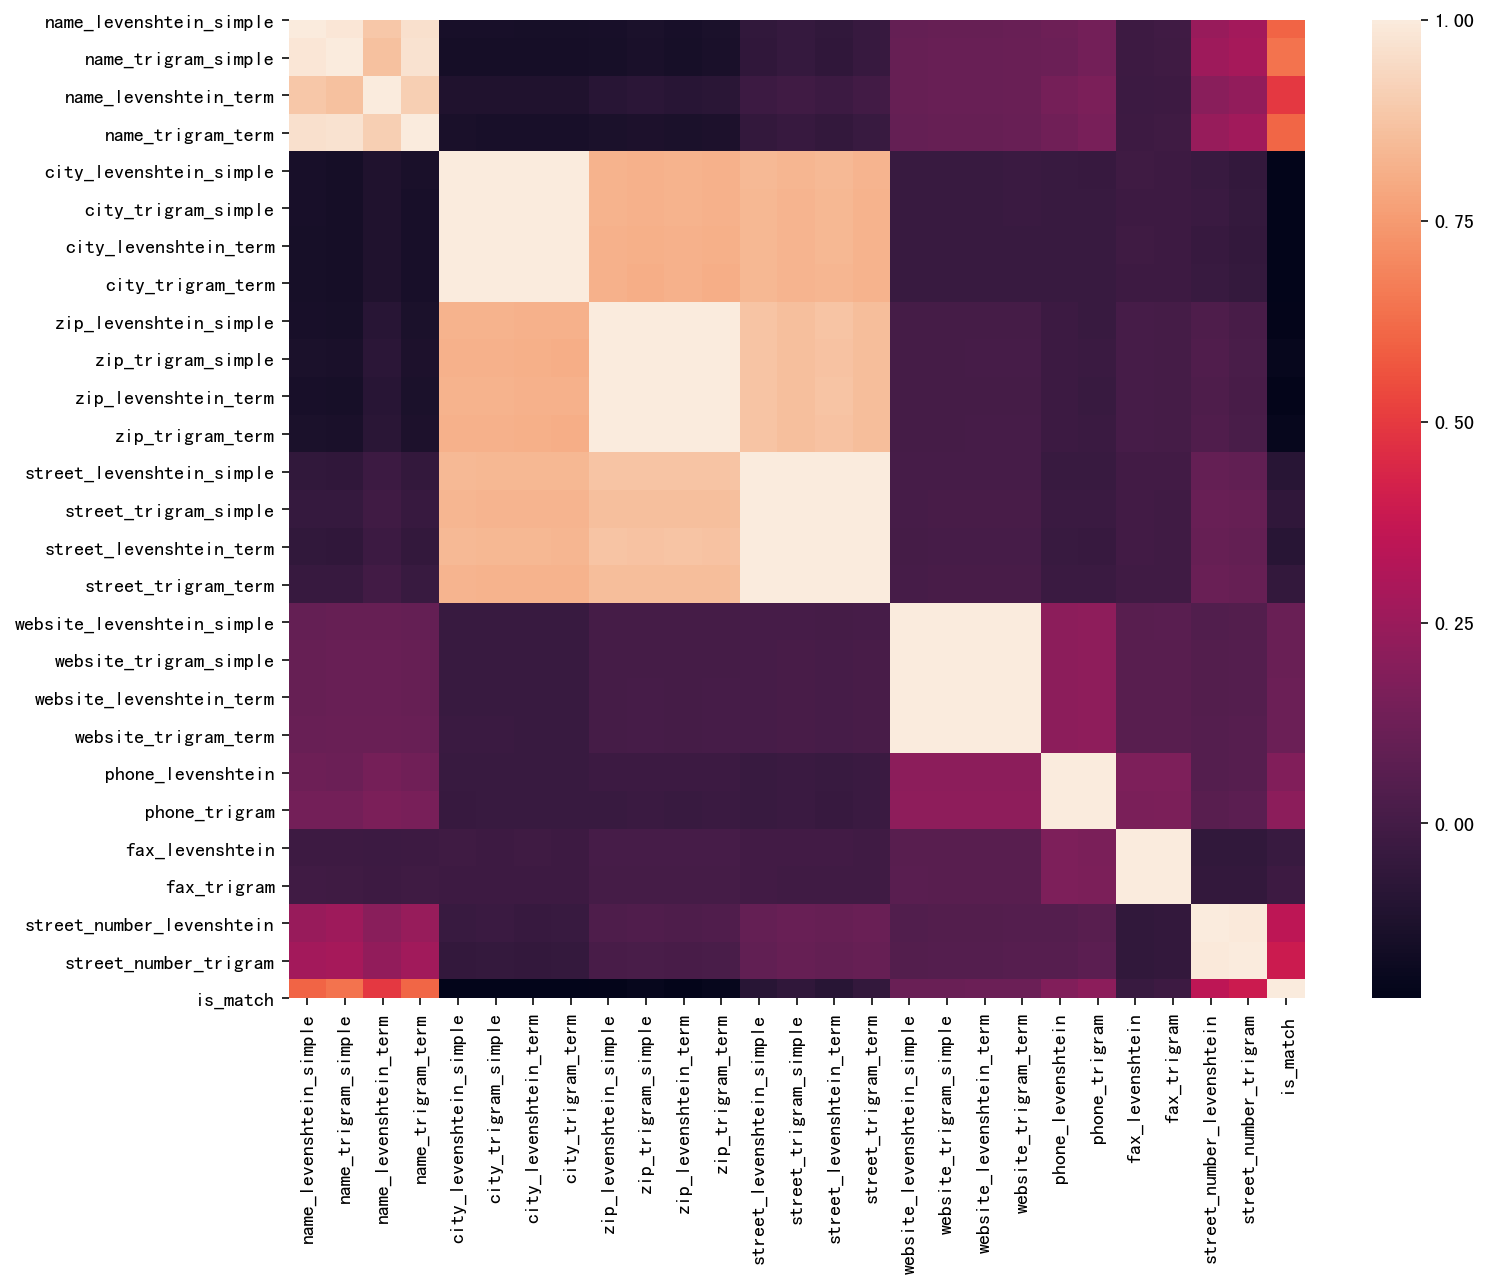

In [53]:
import seaborn as sns

#correlation matrix
corrmat = new_data_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [69]:
# name is major feature
ss = abs(corrmat['is_match'])
ss.sort_values(ascending=False)[:6]

is_match                   1.000000
name_trigram_simple        0.639011
name_trigram_term          0.605314
name_levenshtein_simple    0.604889
name_levenshtein_term      0.492886
street_number_trigram      0.393969
Name: is_match, dtype: float64

In [70]:
ss.sort_values(ascending=False)[-5:]

street_levenshtein_simple    0.087060
street_trigram_simple        0.061251
street_trigram_term          0.052957
fax_levenshtein              0.034624
fax_trigram                  0.022176
Name: is_match, dtype: float64

# Modeling approach
* becasue we have a lot of labeled data so we could try to use a heavy model , such as deep learning
* but overfitting issue , we just use 3 layer and add dropout layer between each hidden layer
* the performnace is prety good

In [9]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


In [10]:

match_list = new_data_df['is_match'].tolist()
del new_data_df['is_match']


In [11]:
new_match_list = []
for v in  match_list:
    if v == 1 : new_match_list.append(1)
    else: new_match_list.append(0)

In [12]:
raw_data = new_data_df.to_numpy()

In [13]:
raw_data.shape

(28235, 26)

In [14]:
simple_model = Sequential([
    Dense(raw_data.shape[1], input_shape=(raw_data.shape[1], )),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(2, activation='softmax')
])

In [15]:
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 26)                702       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                864       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [16]:
simple_model.compile(Adam(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

In [17]:
y_train=keras.utils.to_categorical(new_match_list[:-EVA_SIZE])


In [18]:
X_train = raw_data[:-EVA_SIZE]

In [19]:
simple_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=10, shuffle=True, verbose=2)

Train on 20588 samples, validate on 5147 samples
Epoch 1/10
 - 1s - loss: 0.3422 - accuracy: 0.8515 - val_loss: 0.2684 - val_accuracy: 0.8828
Epoch 2/10
 - 1s - loss: 0.2653 - accuracy: 0.8884 - val_loss: 0.2349 - val_accuracy: 0.9025
Epoch 3/10
 - 1s - loss: 0.2435 - accuracy: 0.8996 - val_loss: 0.2321 - val_accuracy: 0.8961
Epoch 4/10
 - 1s - loss: 0.2304 - accuracy: 0.9050 - val_loss: 0.2060 - val_accuracy: 0.9157
Epoch 5/10
 - 1s - loss: 0.2238 - accuracy: 0.9087 - val_loss: 0.2029 - val_accuracy: 0.9128
Epoch 6/10
 - 1s - loss: 0.2139 - accuracy: 0.9144 - val_loss: 0.1943 - val_accuracy: 0.9192
Epoch 7/10
 - 1s - loss: 0.2094 - accuracy: 0.9160 - val_loss: 0.2007 - val_accuracy: 0.9201
Epoch 8/10
 - 1s - loss: 0.2045 - accuracy: 0.9179 - val_loss: 0.1806 - val_accuracy: 0.9268
Epoch 9/10
 - 1s - loss: 0.1999 - accuracy: 0.9205 - val_loss: 0.1820 - val_accuracy: 0.9238
Epoch 10/10
 - 1s - loss: 0.1957 - accuracy: 0.9218 - val_loss: 0.1756 - val_accuracy: 0.9295


# Performance analysis
* roc_auc is 0.977
* use "grid search" to find the optimization threshhold
* the best threshold is 0.53


In [20]:
X_eva = raw_data[-EVA_SIZE:]
y_eva=keras.utils.to_categorical(new_match_list[-EVA_SIZE:])


In [21]:
simple_model.evaluate(    
    x=X_eva,
    y=y_eva,
    batch_size=None,
    verbose=1,
    sample_weight=None,
    steps=None,)

2500/2500 [==============================] - 0s 22us/step


[0.1788417468637228, 0.9272000193595886]

In [22]:
from sklearn.metrics import precision_score,f1_score

In [23]:
result_prb = simple_model.predict(X_eva)
predict_classes = simple_model.predict_classes(x=X_eva)

In [24]:
precision_score(new_match_list[-EVA_SIZE:],predict_classes)

0.9438692098092643

In [25]:
f1_score(new_match_list[-EVA_SIZE:],predict_classes)

0.9500822819528251

In [26]:
## confusion mattix
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(new_match_list[-EVA_SIZE:],predict_classes).ravel()

In [27]:
(tn, fp, fn, tp)

(586, 103, 79, 1732)

In [28]:
tpr = tp/sum(new_match_list[-EVA_SIZE:])
tnr = tn/sum(i==0 for i in new_match_list[-EVA_SIZE:])
print(tpr,tnr)

0.9563776918829376 0.8505079825834543


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [29]:
def TPR(x,y):
    total = sum([v==1 for v in x ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 1 and x[i] == 1:
            tp_count = tp_count + 1
    return tp_count/total

In [30]:
def TNR(x,y):
    total = sum([v==0 for v in x ])
    tp_count = 0
    for i,v in enumerate(y) :
        if v == 0 and x[i] == 0:
            tp_count = tp_count + 1
    return tp_count/total

In [31]:
def PRE(x,y):
    total = len(x)
    tp_count = 0
    for i,v in enumerate(y) :
        if v == x[i]:
            tp_count = tp_count + 1
    return tp_count/total

In [32]:
print("PRE",PRE(new_match_list[-EVA_SIZE:],predict_classes))
print("TPR",TPR(new_match_list[-EVA_SIZE:],predict_classes))
print("TNR",TNR(new_match_list[-EVA_SIZE:],predict_classes))

PRE 0.9272
TPR 0.9563776918829376
TNR 0.8505079825834543


In [33]:
# Use Grid Search
max_score = -1
score_list = []
for th in np.arange(0.01,1,0.01):
    predict_classes_with_th  = (result_prb[:,1]>th).astype('int')
    print("positive",predict_classes_with_th.sum())
    score = TPR(
        new_match_list[-EVA_SIZE:],predict_classes_with_th) + TNR(
        new_match_list[-EVA_SIZE:],predict_classes_with_th)*3

    print("Score:",score, 
          "TPR:",TPR(new_match_list[-EVA_SIZE:],predict_classes_with_th),
          "TNR:",TNR(new_match_list[-EVA_SIZE:],predict_classes_with_th))
    if score >= max_score : 
        max_score = score
    
    else :
        break
        
    score_list.append(score)
best_th = th - 0.01
# So the threshold is ? , for TPR + TNR*3
print("for best threshold is " , th - 0.01)

positive 2427
Score: 1.3129456418163792 TPR: 0.9994478188845941 TNR: 0.10449927431059507
positive 2344
Score: 1.66943264792884 TPR: 0.9988956377691883 TNR: 0.22351233671988388
positive 2278
Score: 1.9568056522829766 TPR: 0.9988956377691883 TNR: 0.3193033381712627
positive 2217
Score: 2.2125953393990443 TPR: 0.9977912755383765 TNR: 0.40493468795355586
positive 2169
Score: 2.411781252930206 TPR: 0.9966869133075649 TNR: 0.4716981132075472
positive 2134
Score: 2.544550757786435 TPR: 0.9944781888459415 TNR: 0.5166908563134979
positive 2108
Score: 2.652851987411232 TPR: 0.9939260077305356 TNR: 0.5529753265602322
positive 2091
Score: 2.7121533540795286 TPR: 0.9922694643843181 TNR: 0.5732946298984035
positive 2071
Score: 2.799236082671691 TPR: 0.9922694643843181 TNR: 0.602322206095791
positive 2062
Score: 2.838423310538164 TPR: 0.9922694643843181 TNR: 0.6153846153846154
positive 2049
Score: 2.8852144490330422 TPR: 0.9911651021535064 TNR: 0.6313497822931785
positive 2041
Score: 2.92004754046990

In [34]:
from sklearn.metrics import roc_curve,roc_auc_score
## ROC Cuve , I think the normal case , usually is "F1Score"
fpr, tpr, thresholds = roc_curve(new_match_list[-EVA_SIZE:], result_prb[:,1])


In [35]:
# and see roc cuve area 

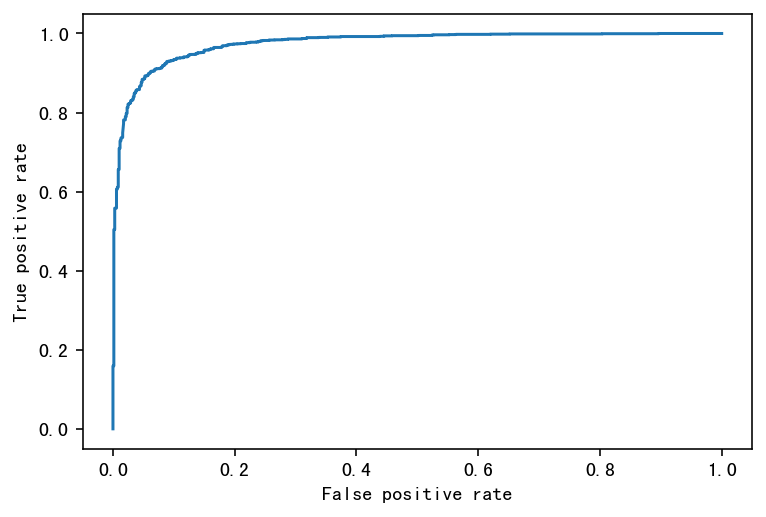

In [36]:

plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


## ROC_AUC score is a good metric to measure the peformance

In [33]:
roc_auc_score(new_match_list[-EVA_SIZE:], result_prb[:,1])

NameError: name 'roc_auc_score' is not defined

# DO testing

In [38]:
test_df = pd.read_csv("./address_matching_test.csv")
test_df.describe()

,name_levenshtein_simple,name_trigram_simple,name_levenshtein_term,name_trigram_term
count,6230.000000,6230.000000,6230.000000,6230.000000
mean,0.617670,0.550384,0.521490,0.493838
std,0.309591,0.372656,0.329626,0.375572
min,0.000000,0.000000,0.000000,0.000000
25%,0.342857,0.172577,0.225806,0.120000
50%,0.666667,0.591837,0.448276,0.450806
75%,1.000000,1.000000,0.865116,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [39]:
# miss value rate
for c in test_df.columns:
    print(c,str(sum(test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.64
city_trigram_simple 0.64
city_levenshtein_term 0.64
city_trigram_term 0.64
zip_levenshtein_simple 0.73
zip_trigram_simple 0.73
zip_levenshtein_term 0.73
zip_trigram_term 0.73
street_levenshtein_simple 0.71
street_trigram_simple 0.71
street_levenshtein_term 0.71
street_trigram_term 0.71
website_levenshtein_simple 0.94
website_trigram_simple 0.94
website_levenshtein_term 0.94
website_trigram_term 0.94
phone_levenshtein 0.59
phone_trigram 0.59
fax_levenshtein 0.97
fax_trigram 0.97
street_number_levenshtein 0.34
street_number_trigram 0.34
phone_equality 0.0
fax_equality 0.0
street_number_equality 0.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [40]:
for c in test_df.columns:
    if 'equality' in c : 
        print("del",c)
        del test_df[c]

del phone_equality
del fax_equality
del street_number_equality


In [41]:
new_test_df = test_df.replace("?",-1)
for c in new_test_df.columns:
    print(c,str(sum(new_test_df[c]=='?')/6230)[:4])

id 0.0
name_levenshtein_simple 0.0
name_trigram_simple 0.0
name_levenshtein_term 0.0
name_trigram_term 0.0
city_levenshtein_simple 0.0
city_trigram_simple 0.0
city_levenshtein_term 0.0
city_trigram_term 0.0
zip_levenshtein_simple 0.0
zip_trigram_simple 0.0
zip_levenshtein_term 0.0
zip_trigram_term 0.0
street_levenshtein_simple 0.0
street_trigram_simple 0.0
street_levenshtein_term 0.0
street_trigram_term 0.0
website_levenshtein_simple 0.0
website_trigram_simple 0.0
website_levenshtein_term 0.0
website_trigram_term 0.0
phone_levenshtein 0.0
phone_trigram 0.0
fax_levenshtein 0.0
fax_trigram 0.0
street_number_levenshtein 0.0
street_number_trigram 0.0


In [42]:
# keep id list and remove it from test_df
id_test_list = new_test_df['id'].tolist()
del new_test_df['id']

In [43]:
raw_test_data = new_test_df.to_numpy()
X_test = raw_test_data

In [44]:
# use model to predict the testing data
test_result = simple_model.predict(X_test)

In [45]:
resut_df =  pd.DataFrame(test_result)

In [46]:
resut_df.describe()

,0,1
count,6230.000000,6230.000000
mean,0.306857,0.693143
std,0.402272,0.402272
min,0.000001,0.002504
25%,0.001581,0.227905
50%,0.030240,0.969760
75%,0.772095,0.998419
max,0.997496,0.999999


In [47]:
# testing data , predict result is as below
answer = list( zip(id_test_list,(test_result[:,1]>best_th).astype(int).tolist()))

In [48]:
pd.DataFrame(answer).describe()

,1
count,6230.000000
mean,0.721027
std,0.448530
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Potential improvements
* ensemble methodology
* becasue fale positive rate is also import to operater. so in real case and production env , we need to build a doubel check mechanism
* strong rule, such as decision tree . this algorithm could produce the human readable result and rule that help our user to understnad the system behavior.


# Conclusion 
* this is a very good challenge to test a data scientist.
* i just build only one model , but i think is so far so good as baseline model.
